In [ ]:
!pip install transformers
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

plt.rc('font', family='NanumBarunGothic')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
test_category_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/도배하자_QA/test_question_category.csv')
test_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/도배하자_QA/test.csv')

In [ ]:
len(test_category_csv), len(test_csv)

(130, 130)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

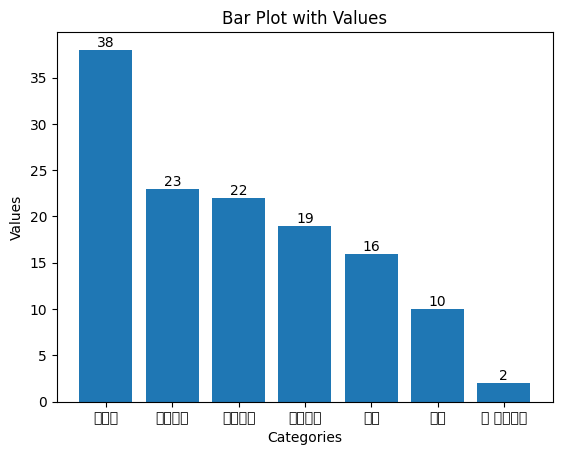

In [ ]:
category_frequency = test_category_csv['category'].value_counts()

# Bar plot
categories = category_frequency.index
values = category_frequency.values
plt.bar(categories, values)

# Add value labels
for i in range(len(categories)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot with Values')

# Show plot
plt.show()


In [ ]:
train_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/도배하자_QA/train.csv')


In [ ]:
## tf idf
from copy import deepcopy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from collections import deque

# Sample documents
document1 = test_category_csv['question'][50] #93, 37
document2 = train_csv['질문_1'].to_list() + train_csv['질문_2'].to_list()
print(document1)
# documents = deepcopy(document2.insert(0, document1))

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(document2)
def find_most_close_one(query, documents):

  answers = tfidf_vectorizer.transform(documents)
  query_vec = tfidf_vectorizer.transform([query])

  answers_samples, answers_features = answers.shape

  most_close_one = None
  most_close_one_score = 0000

  for i in range(answers_samples):
    if cosine_similarity(query_vec, answers[i]) >= most_close_one_score:
      most_close_one = i
      most_close_one_score = cosine_similarity(query_vec, answers[i])

  return documents[most_close_one], most_close_one_score

def find_top_k_most_close_one(query, documents, k=3):

  # tf - idf로 벡터화
  answers = tfidf_vectorizer.transform(documents)
  query_vec = tfidf_vectorizer.transform([query])


  answers_samples, answers_features = answers.shape

  most_close_one = None
  most_close_one_score = 0000

  #queue
  queue = deque(maxlen=k)
  queue.appendleft(most_close_one_score)

  #find top-k closest ones
  for i in range(answers_samples):
    if cosine_similarity(query_vec, answers[i]) >= most_close_one_score:
      most_close_one_score = cosine_similarity(query_vec, answers[i])
      queue.appendleft((documents[i],most_close_one_score))

  return list(queue)







높은 습도로 인해 몰딩수정이 발생하는 경우가 있을까요? 또한, 내부와 외부 온도의 큰 차이로 인해 곰팡이 발생이 빨라지나요?


In [ ]:
find_most_close_one(document1, document2)

('높은 습도로 인해 몰딩수정이 발생할 수 있어?', array([[0.53855966]]))

In [ ]:
print(document1)
find_top_k_most_close_one(document1, document2)

높은 습도로 인해 몰딩수정이 발생하는 경우가 있을까요? 또한, 내부와 외부 온도의 큰 차이로 인해 곰팡이 발생이 빨라지나요?


[('높은 습도로 인해 몰딩수정이 발생할 수 있어?', array([[0.53855966]])),
 ('높은 습도로 인해 도배지와 몰딩면에 틈새가 생길 수 있어?', array([[0.30072724]])),
 ('도배지에 핀 곰팡이 제거 방법은?', array([[0.16267871]]))]

In [ ]:
#test question and the most close question among train questions

queries = test_category_csv['question'].to_list()
questions = train_csv['질문_1'].to_list() + train_csv['질문_2'].to_list()

records=[]
for i in range(len(queries)):
  record = [queries[i]] + list(find_most_close_one(queries[i], questions))
  records.append(record)








In [ ]:

query_questions_df = pd.DataFrame(records, columns=['test_question', 'train_question', 'similarity_socre'])
query_questions_df

,test_question,train_question,similarity_socre
0,"방청 페인트의 종류에는 어떤 것들이 있는지 알고 계신가요? 또한, 원목사이딩을 사용...",다공질 흡음재의 종류에는 어떤 것들이 있는지 알 수 있을까요?,[[0.5472398076514764]]
1,도배지에 녹은 자국이 발생하는 주된 원인과 그 해결 방법은 무엇인가요?,창호 결로가 발생하는 주된 이유는 무엇인가요?,[[0.3743669814291142]]
2,"큐블럭의 단점을 알려주세요. 또한, 압출법 단열판을 사용하는 것의 장점은 무엇인가요?",송판 노출콘크리트를 사용하는 것의 장점은 무엇인가요?,[[0.5360395779906229]]
3,"철골구조를 사용하는 고층 건물에서, 단열 효과를 높이기 위한 시공 방법은 무엇이 있...",모노벽돌을 사용하는 장점에는 무엇이 있을까요?,[[0.3234816731213942]]
4,도배지의 완전한 건조를 위해 몇 주 동안 기다려야 하나요?,도배지의 끝부분이 들뜨는 경우 해결할 방법이 있을까요?,[[0.25220260838510405]]
5,철근철골콘크리트 구조가 적용된 건물의 장단점은 무엇인가요?,프리케스트콘크리트 구조가 뭐야?,[[0.45703948853548]]
6,"어떤 상황에 개별 공간이 더 적합한지, 어떤 상황에 오픈 플랜 공간이 더 적합한지 ...",개별 공간과 오픈 플랜 공간 중 어떤 것이 나에게 더 적합한가요?,[[0.37371613356711547]]
7,도배지 들뜸 현상이 발생하는 가장 일반적인 원인은 무엇인가요?,천장 부위 결로가 발생하는 가장 일반적인 원인은 무엇인가요?,[[0.5934785541892801]]
8,도배지에 얼룩이 생기는 다양한 원인들에 대해서 자세히 알려주세요.,점토기의 장점에 대해서 자세히 알려주세요.,[[0.5253970564450652]]
9,고층 건물을 건축할 때 철골구조가 주로 선택되는 이유는 무엇인가요?,철골구조가 뭐야?,[[0.3997045673618321]]
